# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import pdist, cdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
data = pd.read_csv('stock_data.csv')
df = data.copy()

## Data Overview

In [3]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are 4 categorical variables and 11 numeric variables in this dataset.
* We have 340 rows and 15 columns in this dataset.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


* There are 11 unique values for the GICS Sector column, with Industrials being the most common with 53 instances.
* There are 104 unique values for the GICS Sub Industry column, with Oil & Gas Exploration & Production being the most common with 16 instances.

In [6]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no null values in this dataset.

In [7]:
df.duplicated().sum()

0

* There are no duplicates in this dataset.

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

**GICS Sector**

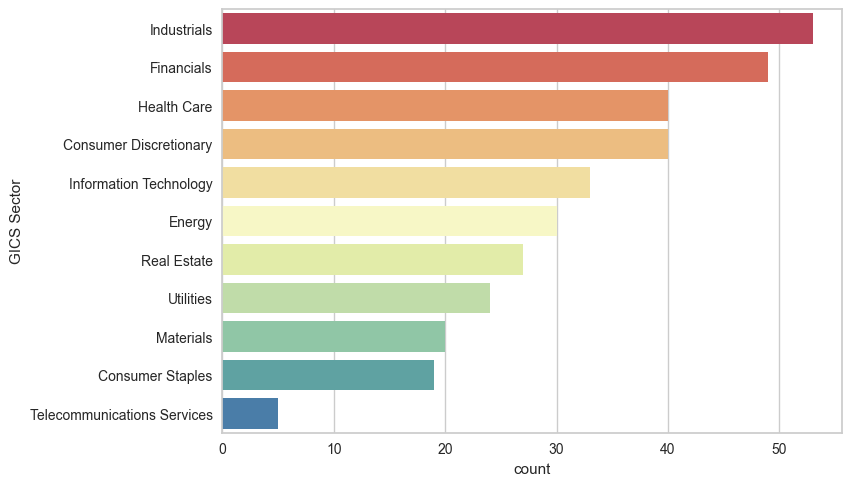

In [8]:
# get list of names, sorted by count in descending order
olist = df['GICS Sector'].value_counts().index

sns.countplot(
    data=df,
    y='GICS Sector',
    hue='GICS Sector',
    order=olist,
    hue_order=olist,
    palette='Spectral'
)

plt.show()

* Industrials has the highest frequency with a count of over 50.
* Financials has the 2nd highest freq. with a count of just under 50.
* Telecommunications Services has the lowest freq. with a count of under 10.

**GICS Sub Industry**

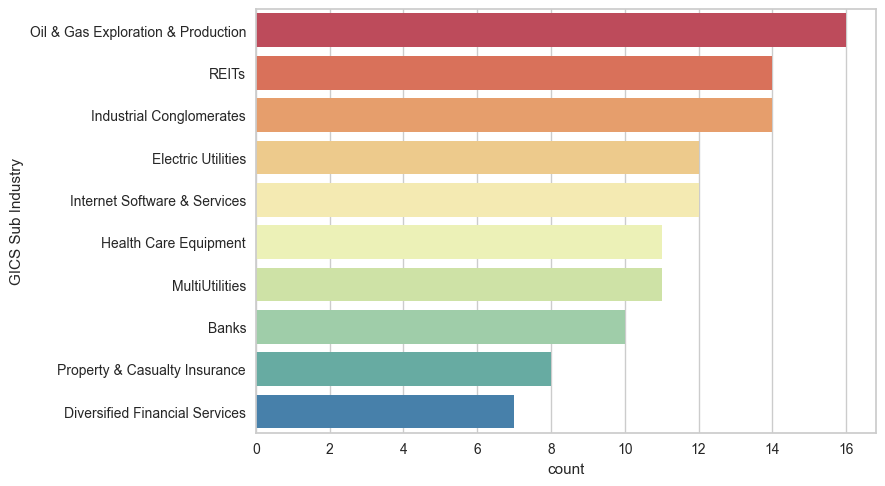

In [9]:
# get list of names, sorted by count in descending order, limit to 10
olist = df['GICS Sub Industry'].value_counts().index[:10]

sns.countplot(
    data=df,
    y='GICS Sub Industry',
    hue='GICS Sub Industry',
    order=olist,
    hue_order=olist,
    palette='Spectral'
)

plt.show()

* This visual displays only the top 10 most frequent sub industries, however there are 104 total sub industries in this dataset.
* Oil & Gas Exploration & Production have the highest frequency with a count of 16.
* REITs and Industrial Conglomerates are tied for 2nd most common with a count of 14.

In [10]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Current Price**

**1. What does the distribution of stock prices look like?**

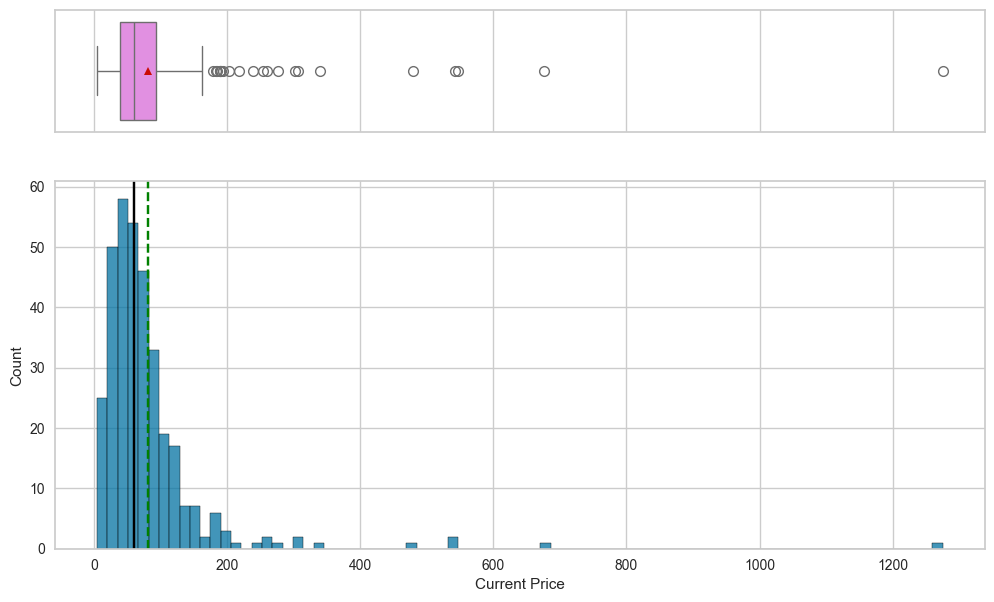

In [11]:
histogram_boxplot(df, 'Current Price')

* Right skewed distribution
* Many outliers on the right
* Outlier on right very far from other outliers
* Mean stock price just under 100

**Volatility**

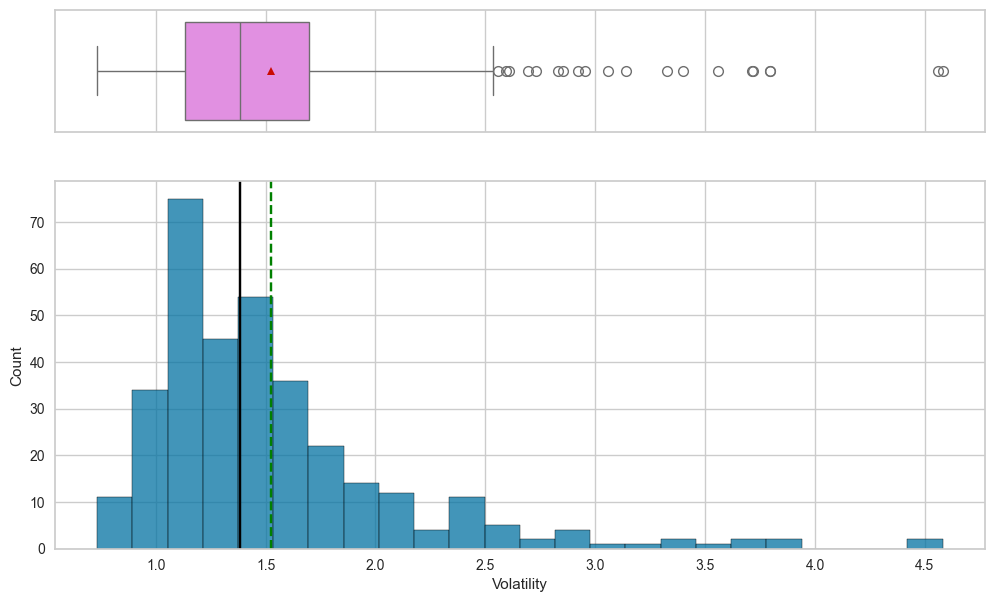

In [12]:
histogram_boxplot(df, 'Volatility')

* Right skewed distribution
* Many outliers on the right
* Mean is about 1.5

**ROE**

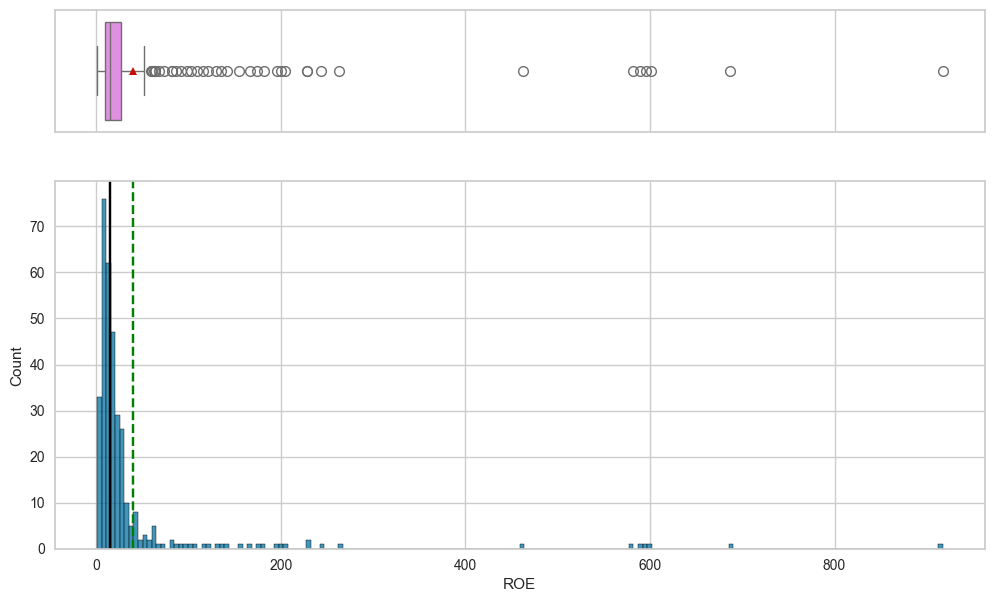

In [13]:
histogram_boxplot(df, 'ROE')

* Right skewed distribution
* Many outliers on the right

**Cash Ratio**

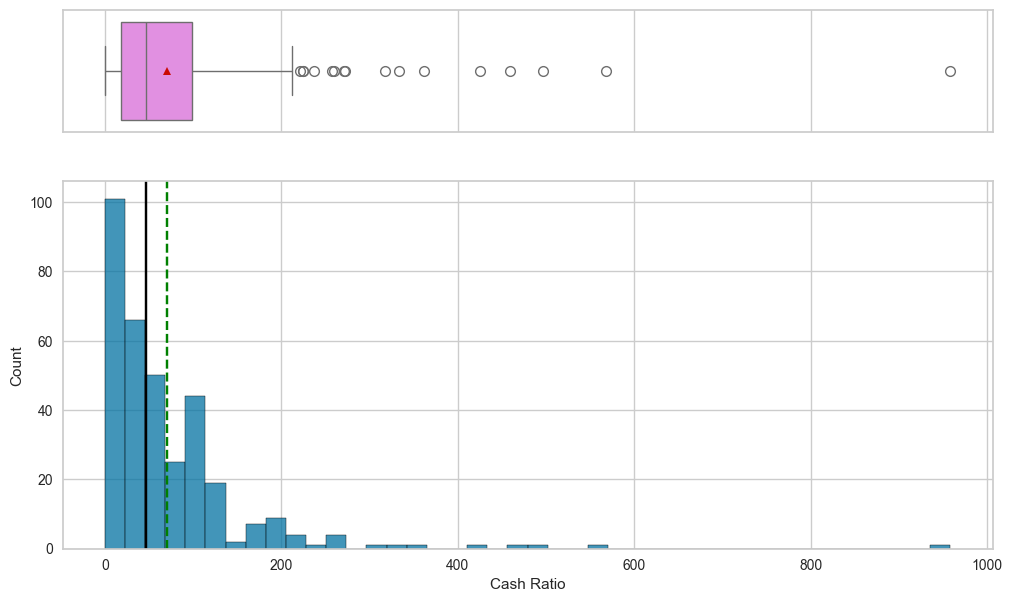

In [14]:
histogram_boxplot(df, 'Cash Ratio')

* Right skewed distribution
* Many outliers on the right
* Distribution is similar to Current Price distribution
* Outlier on right very far from other outliers

**Net Cash Flow**

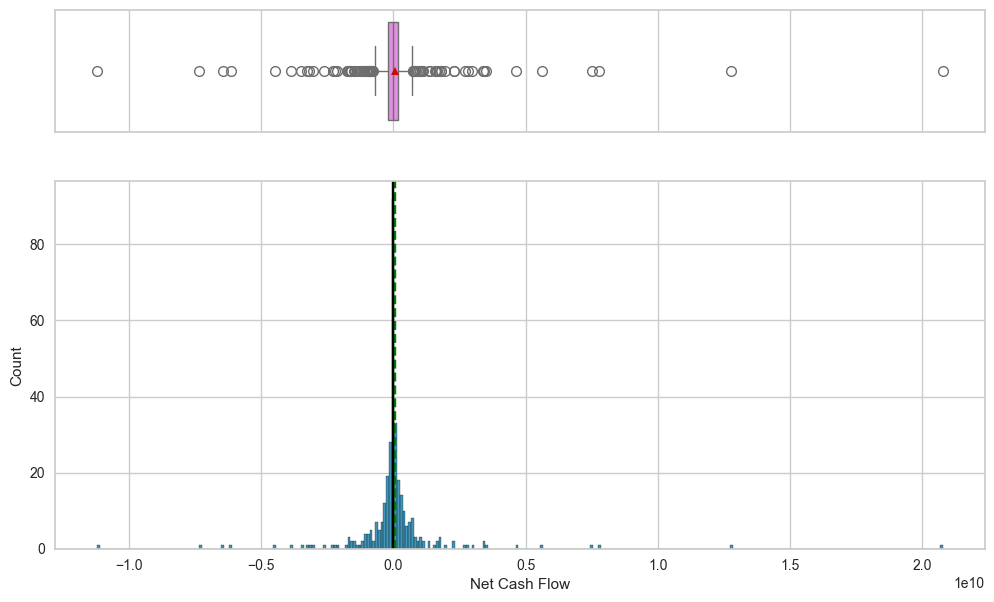

In [15]:
histogram_boxplot(df, 'Net Cash Flow')

* Normal distribution
* Many outliers on both sides
* Dealing with vary large numbers

**Net Income**

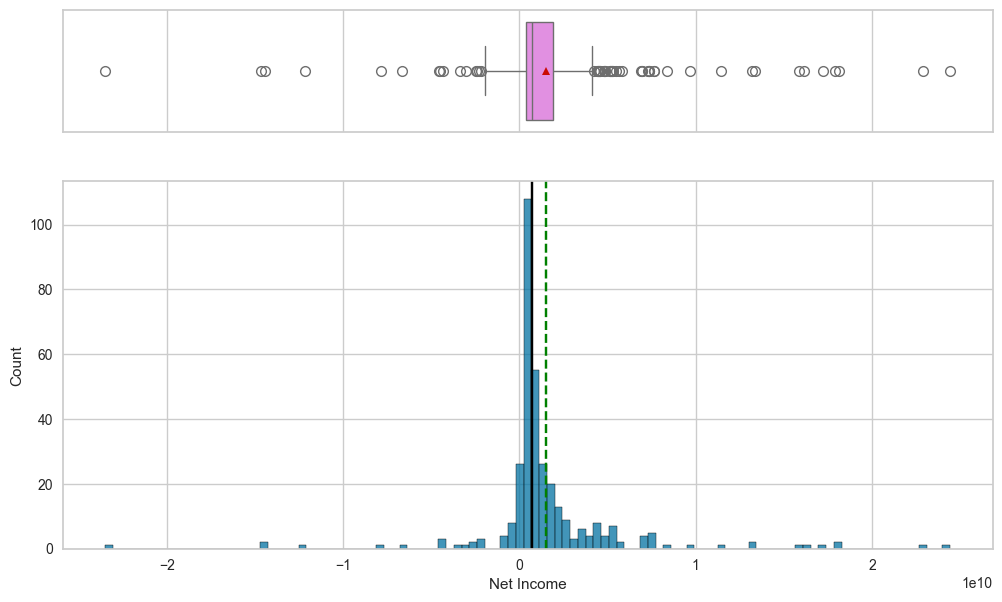

In [16]:
histogram_boxplot(df, 'Net Income')

* Right skewed distribution
* Many outliers on both sides
* Dealing with very large numbers

**Earnings Per Share**

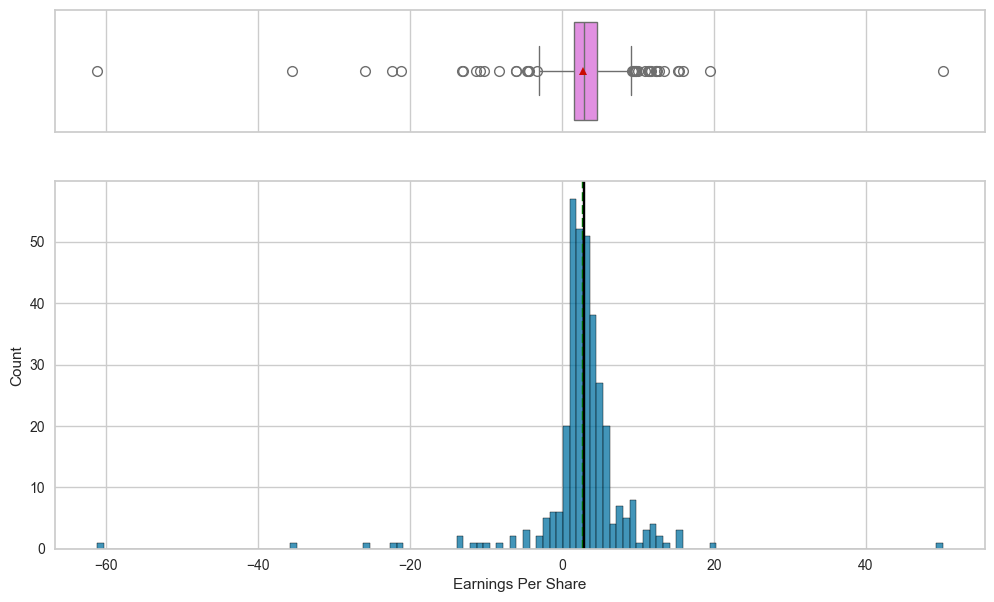

In [17]:
histogram_boxplot(df, 'Earnings Per Share')

* Fairly normal distribution
* Outliers on both sides
* Mean and median just above 0

**Estimated Shares Outstanding**

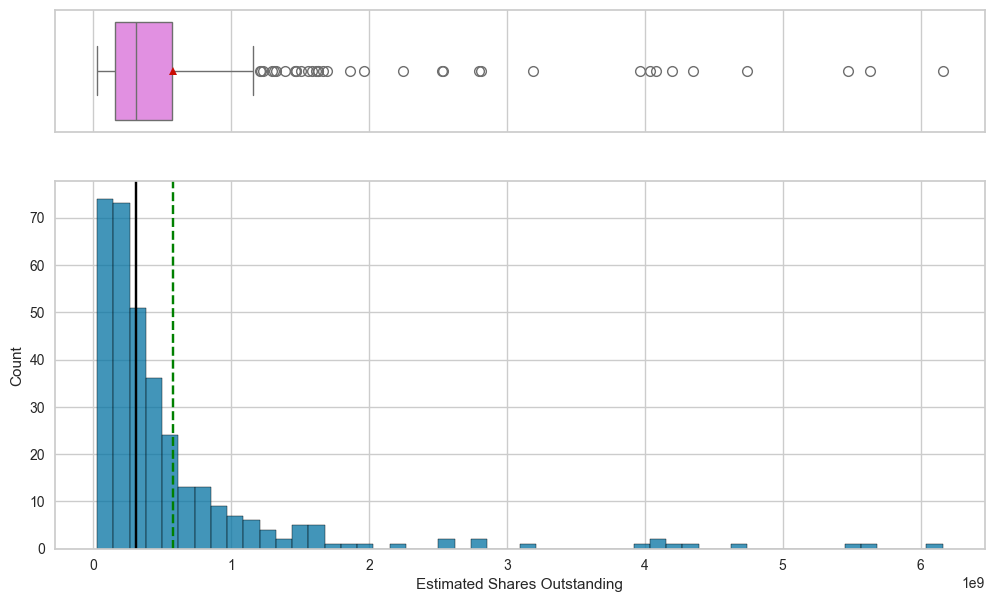

In [18]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

* Right skewed distribution
* Many outliers on the right
* Dealing with very large numbers

**P/E Ratio**

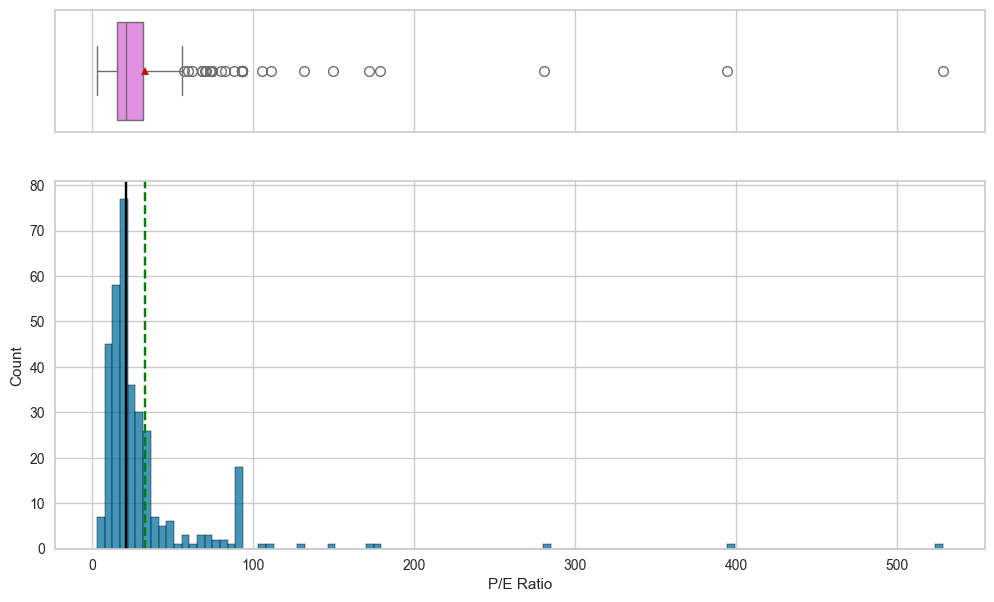

In [19]:
histogram_boxplot(df, 'P/E Ratio')

* Right skewed distribution
* Many outliers on the right

**P/B Ratio**

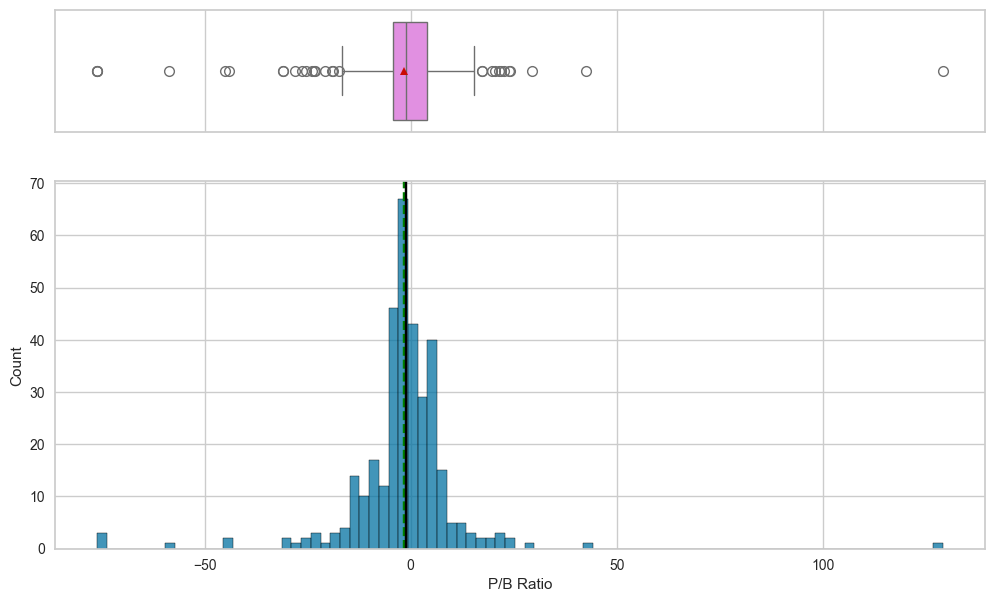

In [20]:
histogram_boxplot(df, 'P/B Ratio')

* Fairly normal distribution
* Outliers on both sides
* Outlier on right very far from other outliers

### Bivariate Analysis

**3. How are the different variables correlated with each other?**

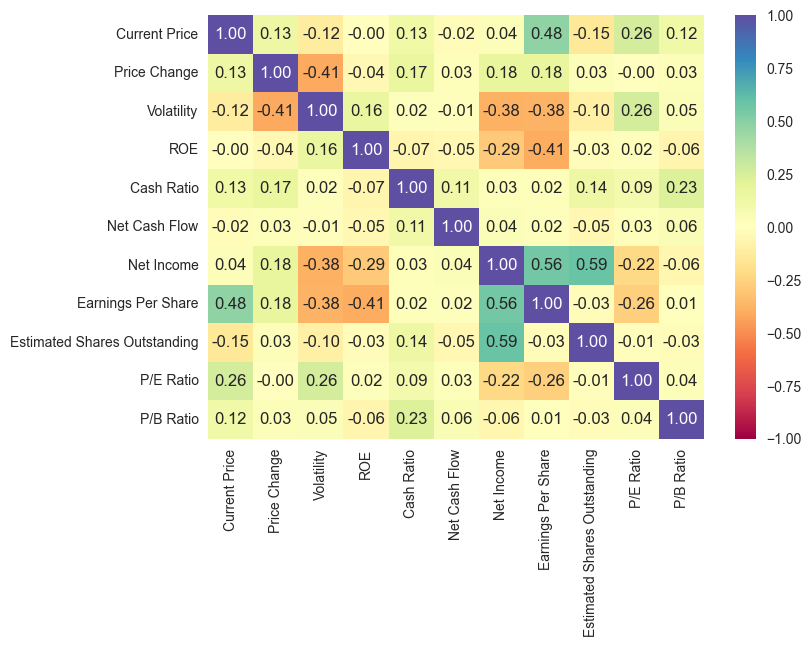

In [21]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

* Net Income vs. Estimated Shares Outstanding has the highest positive correlation.
* Net Income vs. Earnings Per Share has the 2nd highest positive correlation.
* Current Price vs. Earnings Per Share has the 3rd highest positive correlation.
* Volatility vs. Price Change and ROE vs. Earnings Per Share have the highest negative correlation.

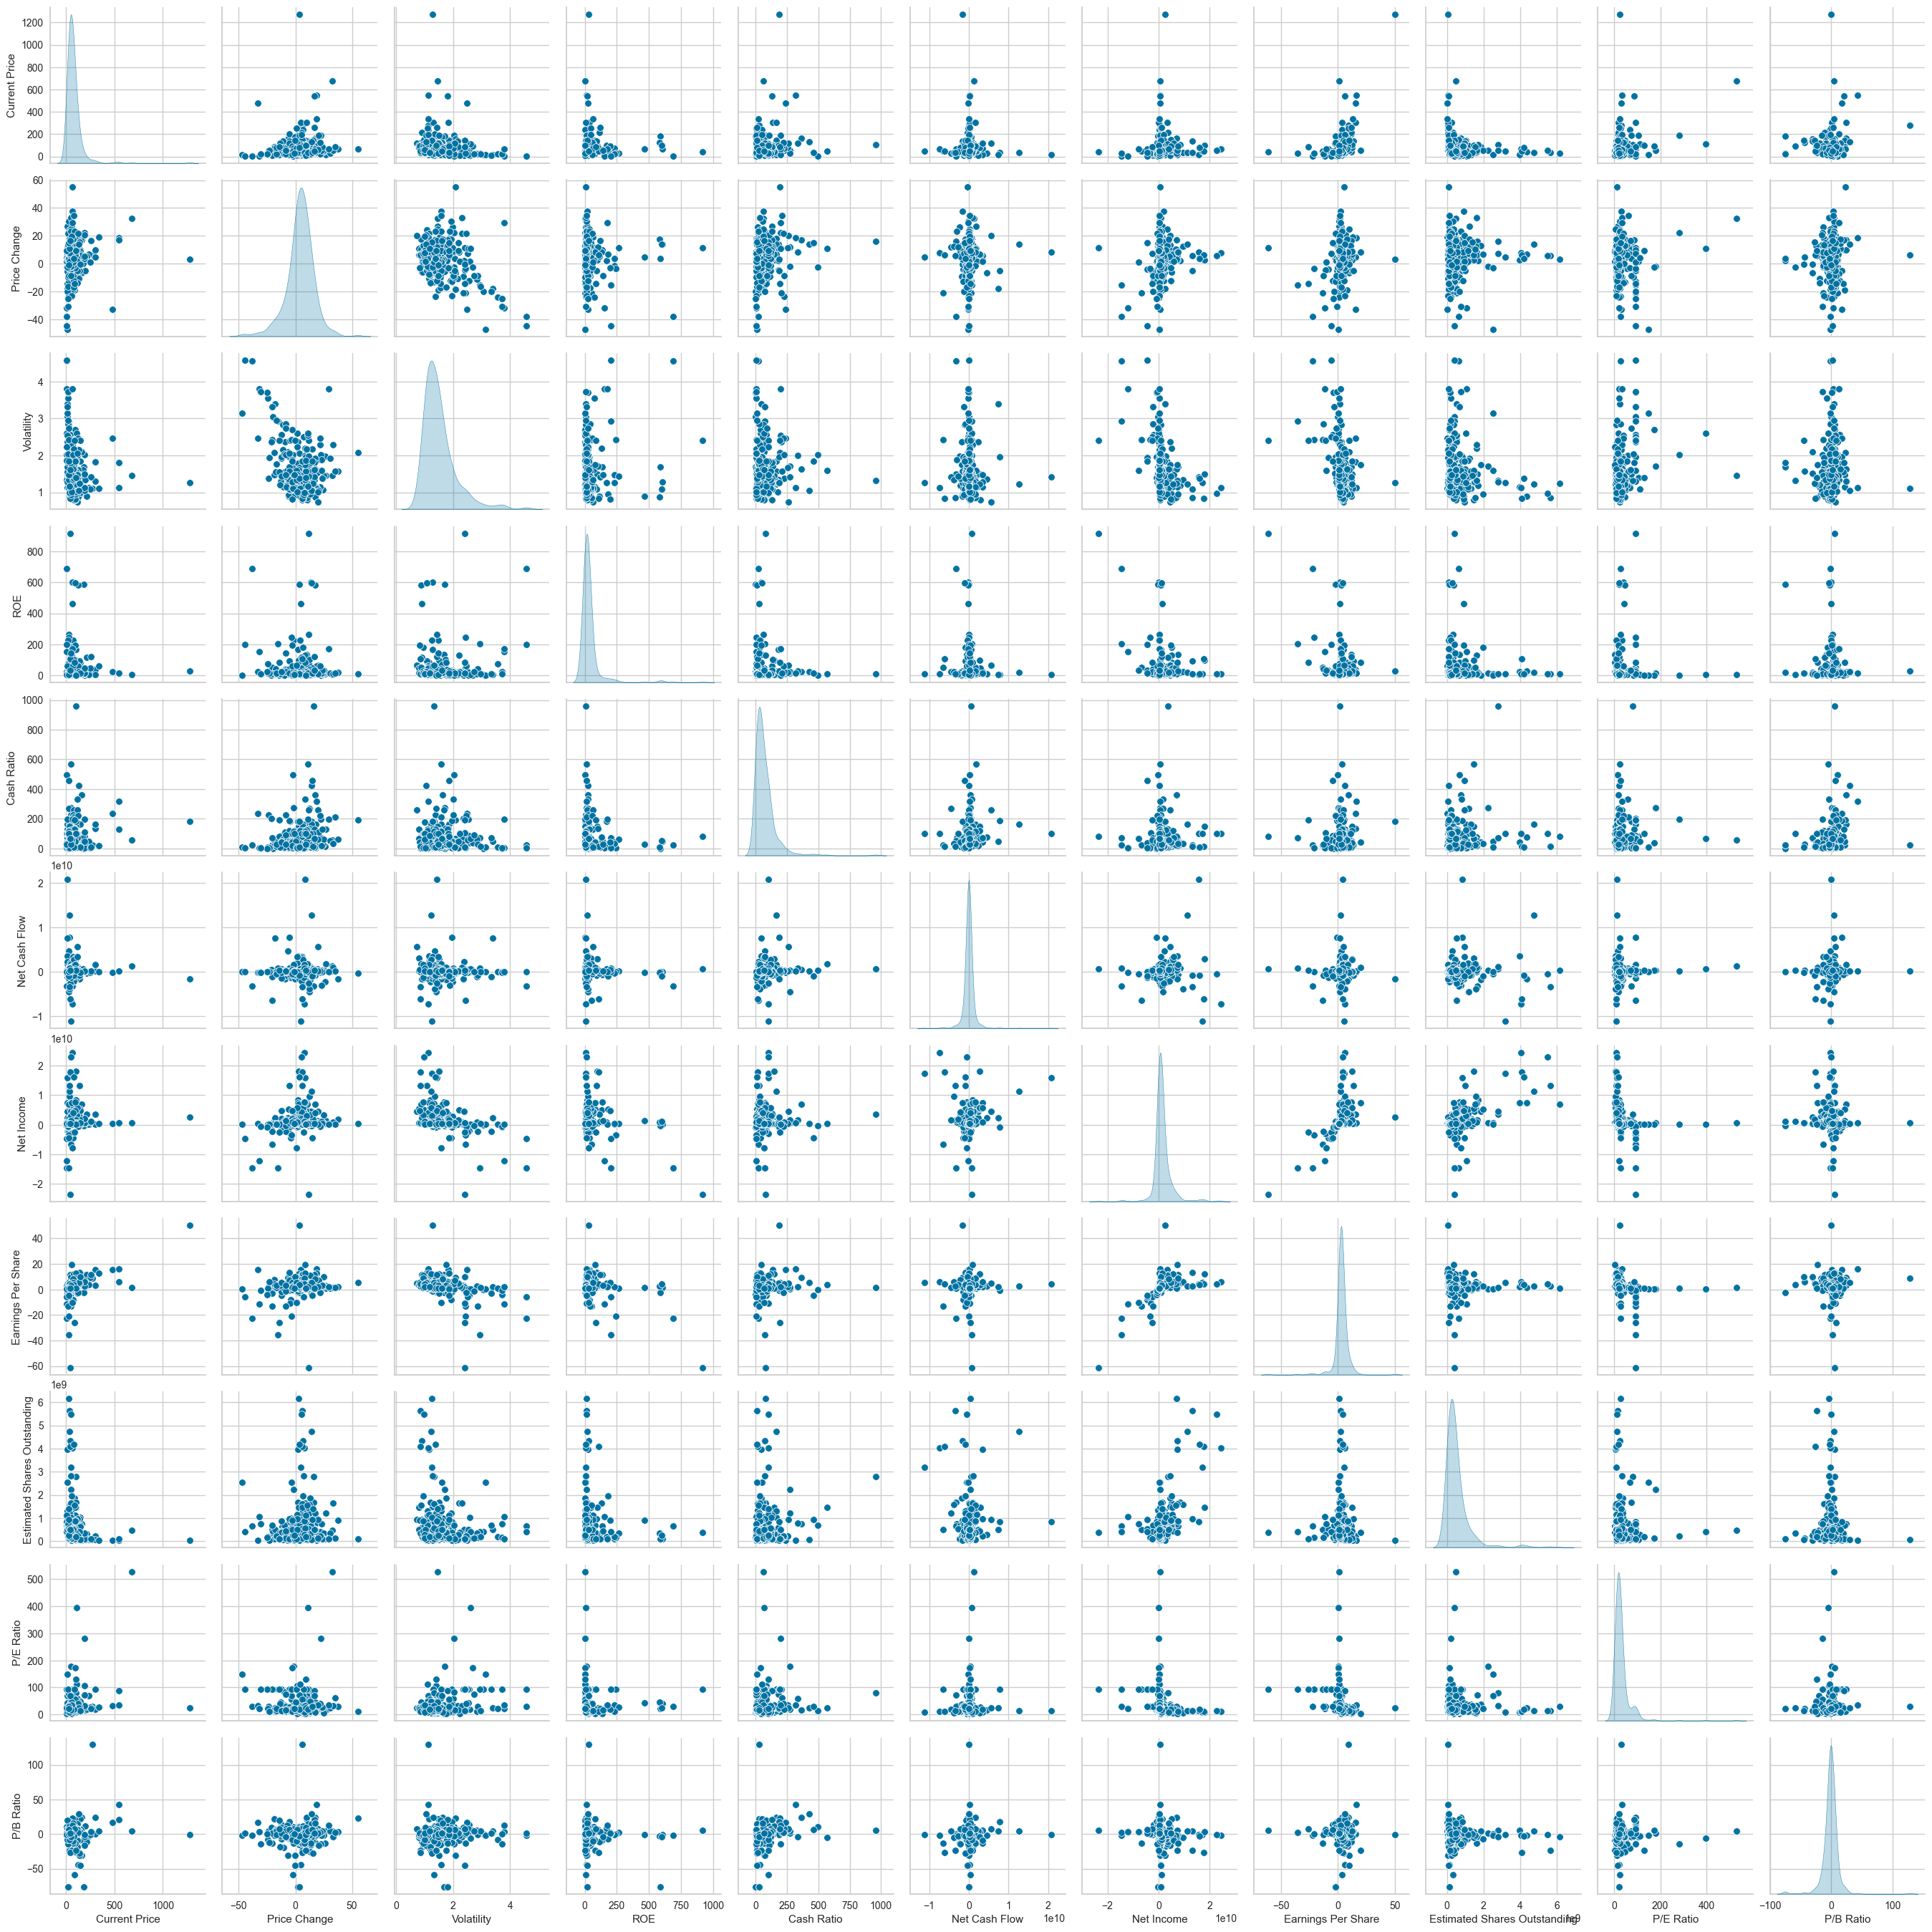

In [22]:
sns.pairplot(df, diag_kind='kde')

* Stocks with a Price Change close to 0 tend to have a higher ROE.
* Stocks with a higher Volatility tend to have a more negative Price Change.
* A higher Net Income is associated with higher Earnings Per Share.

**2. The stocks of which economic sector have seen the maximum price increase on average?**

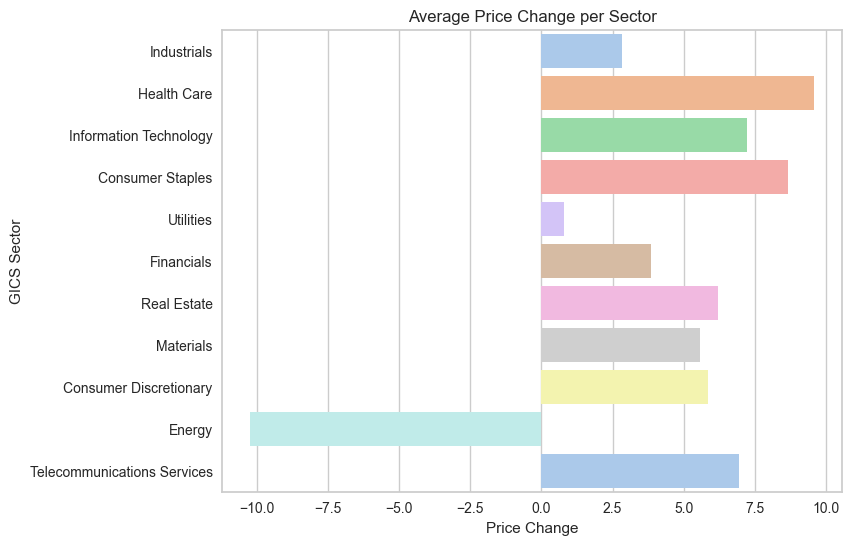

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(df, y='GICS Sector', x='Price Change', estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Average Price Change per Sector')
plt.show()

* Health Care has the highest price increase on average.
* Consumer Staples has the 2nd highest price increase on average.
* Information Technology and Telecommunications Services have the 3rd and 4th highest price increases on average.
* Energy is the only sector with a negative average price change.

**4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

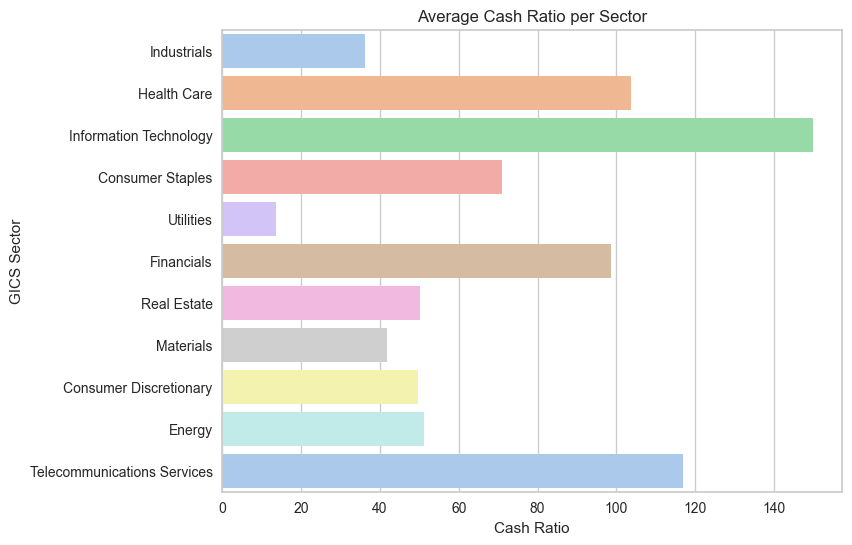

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(df, y='GICS Sector', x='Cash Ratio', estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Average Cash Ratio per Sector')
plt.show()

* The Information Technology sector has the highest average Cash Ratio.
* Utilities has the lowest average Cash Ratio.

**5. How does the P/E ratio vary, on average, across economic sectors?**

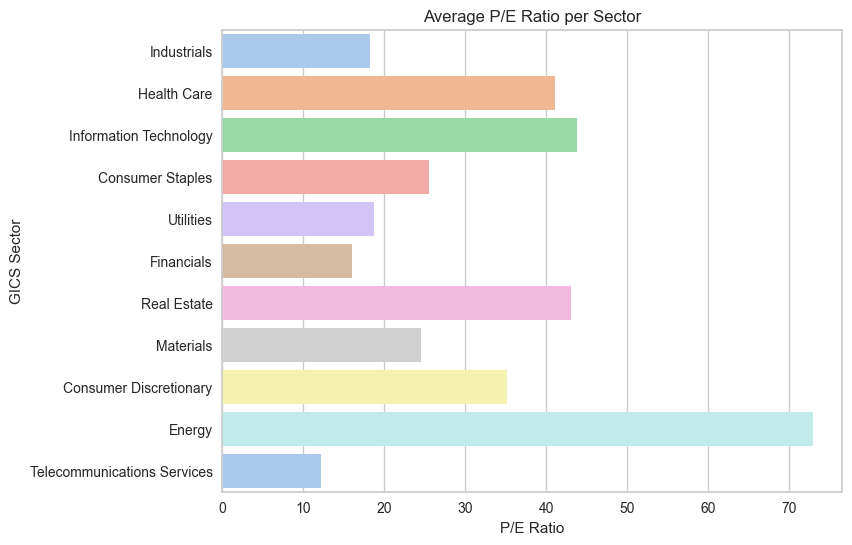

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(df, y='GICS Sector', x='P/E Ratio', estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Average P/E Ratio per Sector')
plt.show()

* The Energy sector has the highest P/E Ratio by far, which is above 70.
* The Information Technology sector has the second highest average P/E Ratio at about 45.
* The Telecommunications Services sector has the lowest P/E Ratio just above 10.

## Data Preprocessing

In [26]:
# add numerical columns to list
num_col = df.select_dtypes(include=np.number).columns.tolist()

### Scaling

In [27]:
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [28]:
# create df of scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [29]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

In [31]:
# create copy of scaled data to use for k-means clustering
k_means_df = subset_scaled_df.copy()

Number of clusters: 1 	Average Distortion: 2.5425069919221697
Number of clusters: 2 	Average Distortion: 2.3862098789299604
Number of clusters: 3 	Average Distortion: 2.33620927590848
Number of clusters: 4 	Average Distortion: 2.2190505638334423
Number of clusters: 5 	Average Distortion: 2.133404401901685
Number of clusters: 6 	Average Distortion: 2.0815036860937144
Number of clusters: 7 	Average Distortion: 2.0045413402786814
Number of clusters: 8 	Average Distortion: 1.986423782487441
Number of clusters: 9 	Average Distortion: 1.956222103389025
Number of clusters: 10 	Average Distortion: 1.9360473996664198
Number of clusters: 11 	Average Distortion: 1.8615942883461607
Number of clusters: 12 	Average Distortion: 1.8219574388532505
Number of clusters: 13 	Average Distortion: 1.7936924742607907
Number of clusters: 14 	Average Distortion: 1.7567842179093438


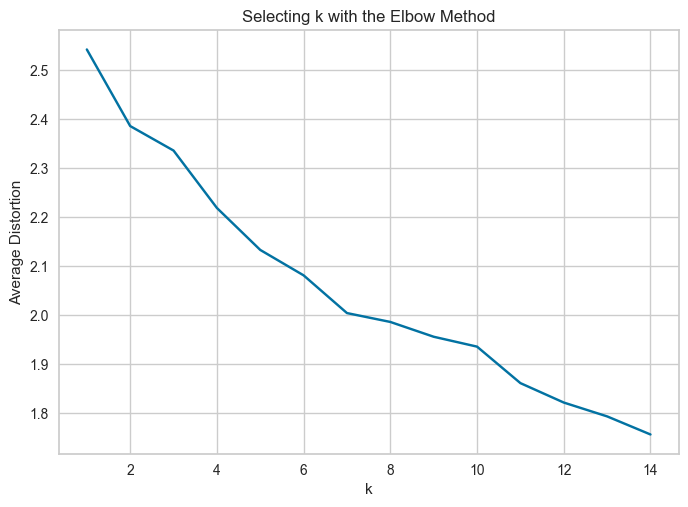

In [32]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_,'euclidean'), axis=1)) / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

* There appears to be an elbow point around k=5 and k=7

For n_clusters = 2, the silhouette score is 0.4469482880666969
For n_clusters = 3, the silhouette score is 0.42955834398734566
For n_clusters = 4, the silhouette score is 0.4268057723687655
For n_clusters = 5, the silhouette score is 0.3308551770808077
For n_clusters = 6, the silhouette score is 0.418817492887465
For n_clusters = 7, the silhouette score is 0.40304226602810234
For n_clusters = 8, the silhouette score is 0.228220456696341
For n_clusters = 9, the silhouette score is 0.2082491065035865
For n_clusters = 10, the silhouette score is 0.10809282458940915
For n_clusters = 11, the silhouette score is 0.1382903955185724
For n_clusters = 12, the silhouette score is 0.17046640534451368
For n_clusters = 13, the silhouette score is 0.1404750841759922
For n_clusters = 14, the silhouette score is 0.12672803799228727
For n_clusters = 15, the silhouette score is 0.1126217813602289


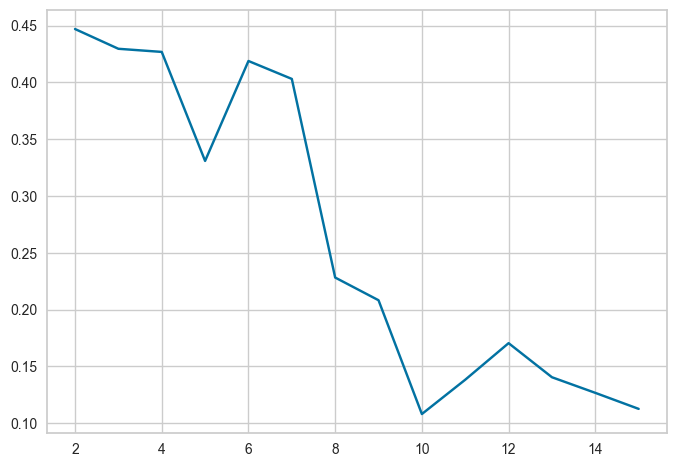

In [33]:
sil_score = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(k_means_df)
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score}")

plt.plot(cluster_list, sil_score)
plt.show()

* k=4 has a good silhouette score but k=5 is slightly higher
* k=7 has a worse silhouette score than k=4 or k=5

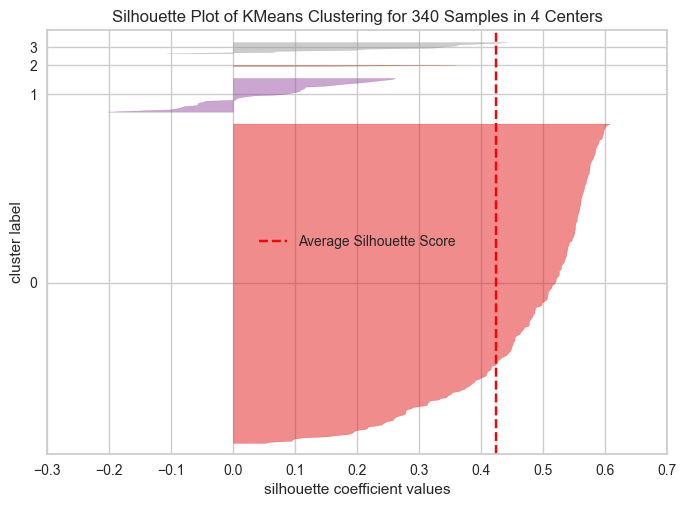

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

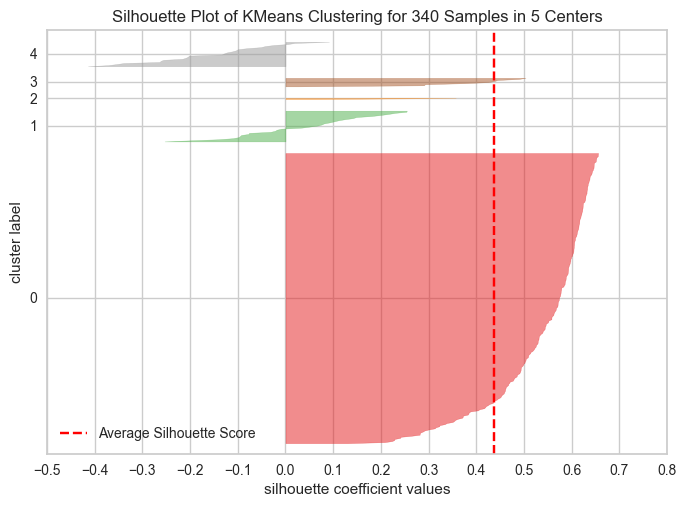

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

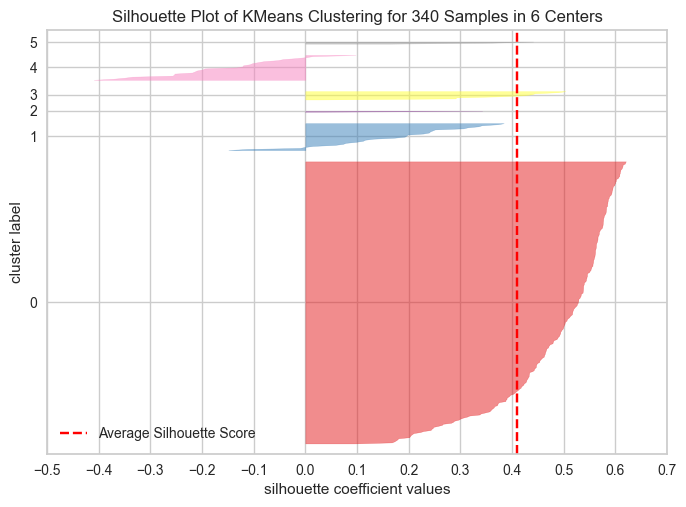

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating final model

In [37]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [38]:
df1 = df.copy()

k_means_df['KMeans_segments'] = kmeans.labels_
df1['KMeans_segments'] = kmeans.labels_

### Cluster profiling

In [39]:
km_cluster_profile = df1.groupby('KMeans_segments').mean(numeric_only=True)

In [40]:
km_cluster_profile['count_in_each_segment'] = df1.groupby('KMeans_segments')['Security'].count().values

In [41]:
km_cluster_profile.style.highlight_max(color='yellow', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KMeans_segments,,,,,,,,,,,,
0,84.176635,5.702764,1.396635,33.962712,69.972881,90456322.033898,1517730698.305085,3.890390,444140390.526542,24.645180,-2.015145,295
1,64.263438,-10.382780,2.732033,46.812500,69.656250,205568000.000000,-2018462218.750000,-5.177187,526311835.891875,110.425211,1.787692,32
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11


* Cluster 0 exhibits a moderate Current Price, Cash Ratio, and positive Net Cash Flow, potentially representing companies with stable financials and moderate growth.
* Cluster 1 shows a negative Price Change and very high Volatility along with negative Net Income, indicating companies that might be financially unstable or undergoing significant financial stress.
* Cluster 2 stands out with an extremely high ROE and very negative Net Cash Flow, suggesting outliers or companies with unique financial characteristics.
* Cluster 3 has moderate financial metrics, with a positive Net Income and a strong P/E Ratio, possibly indicating companies with steady growth and profitability.

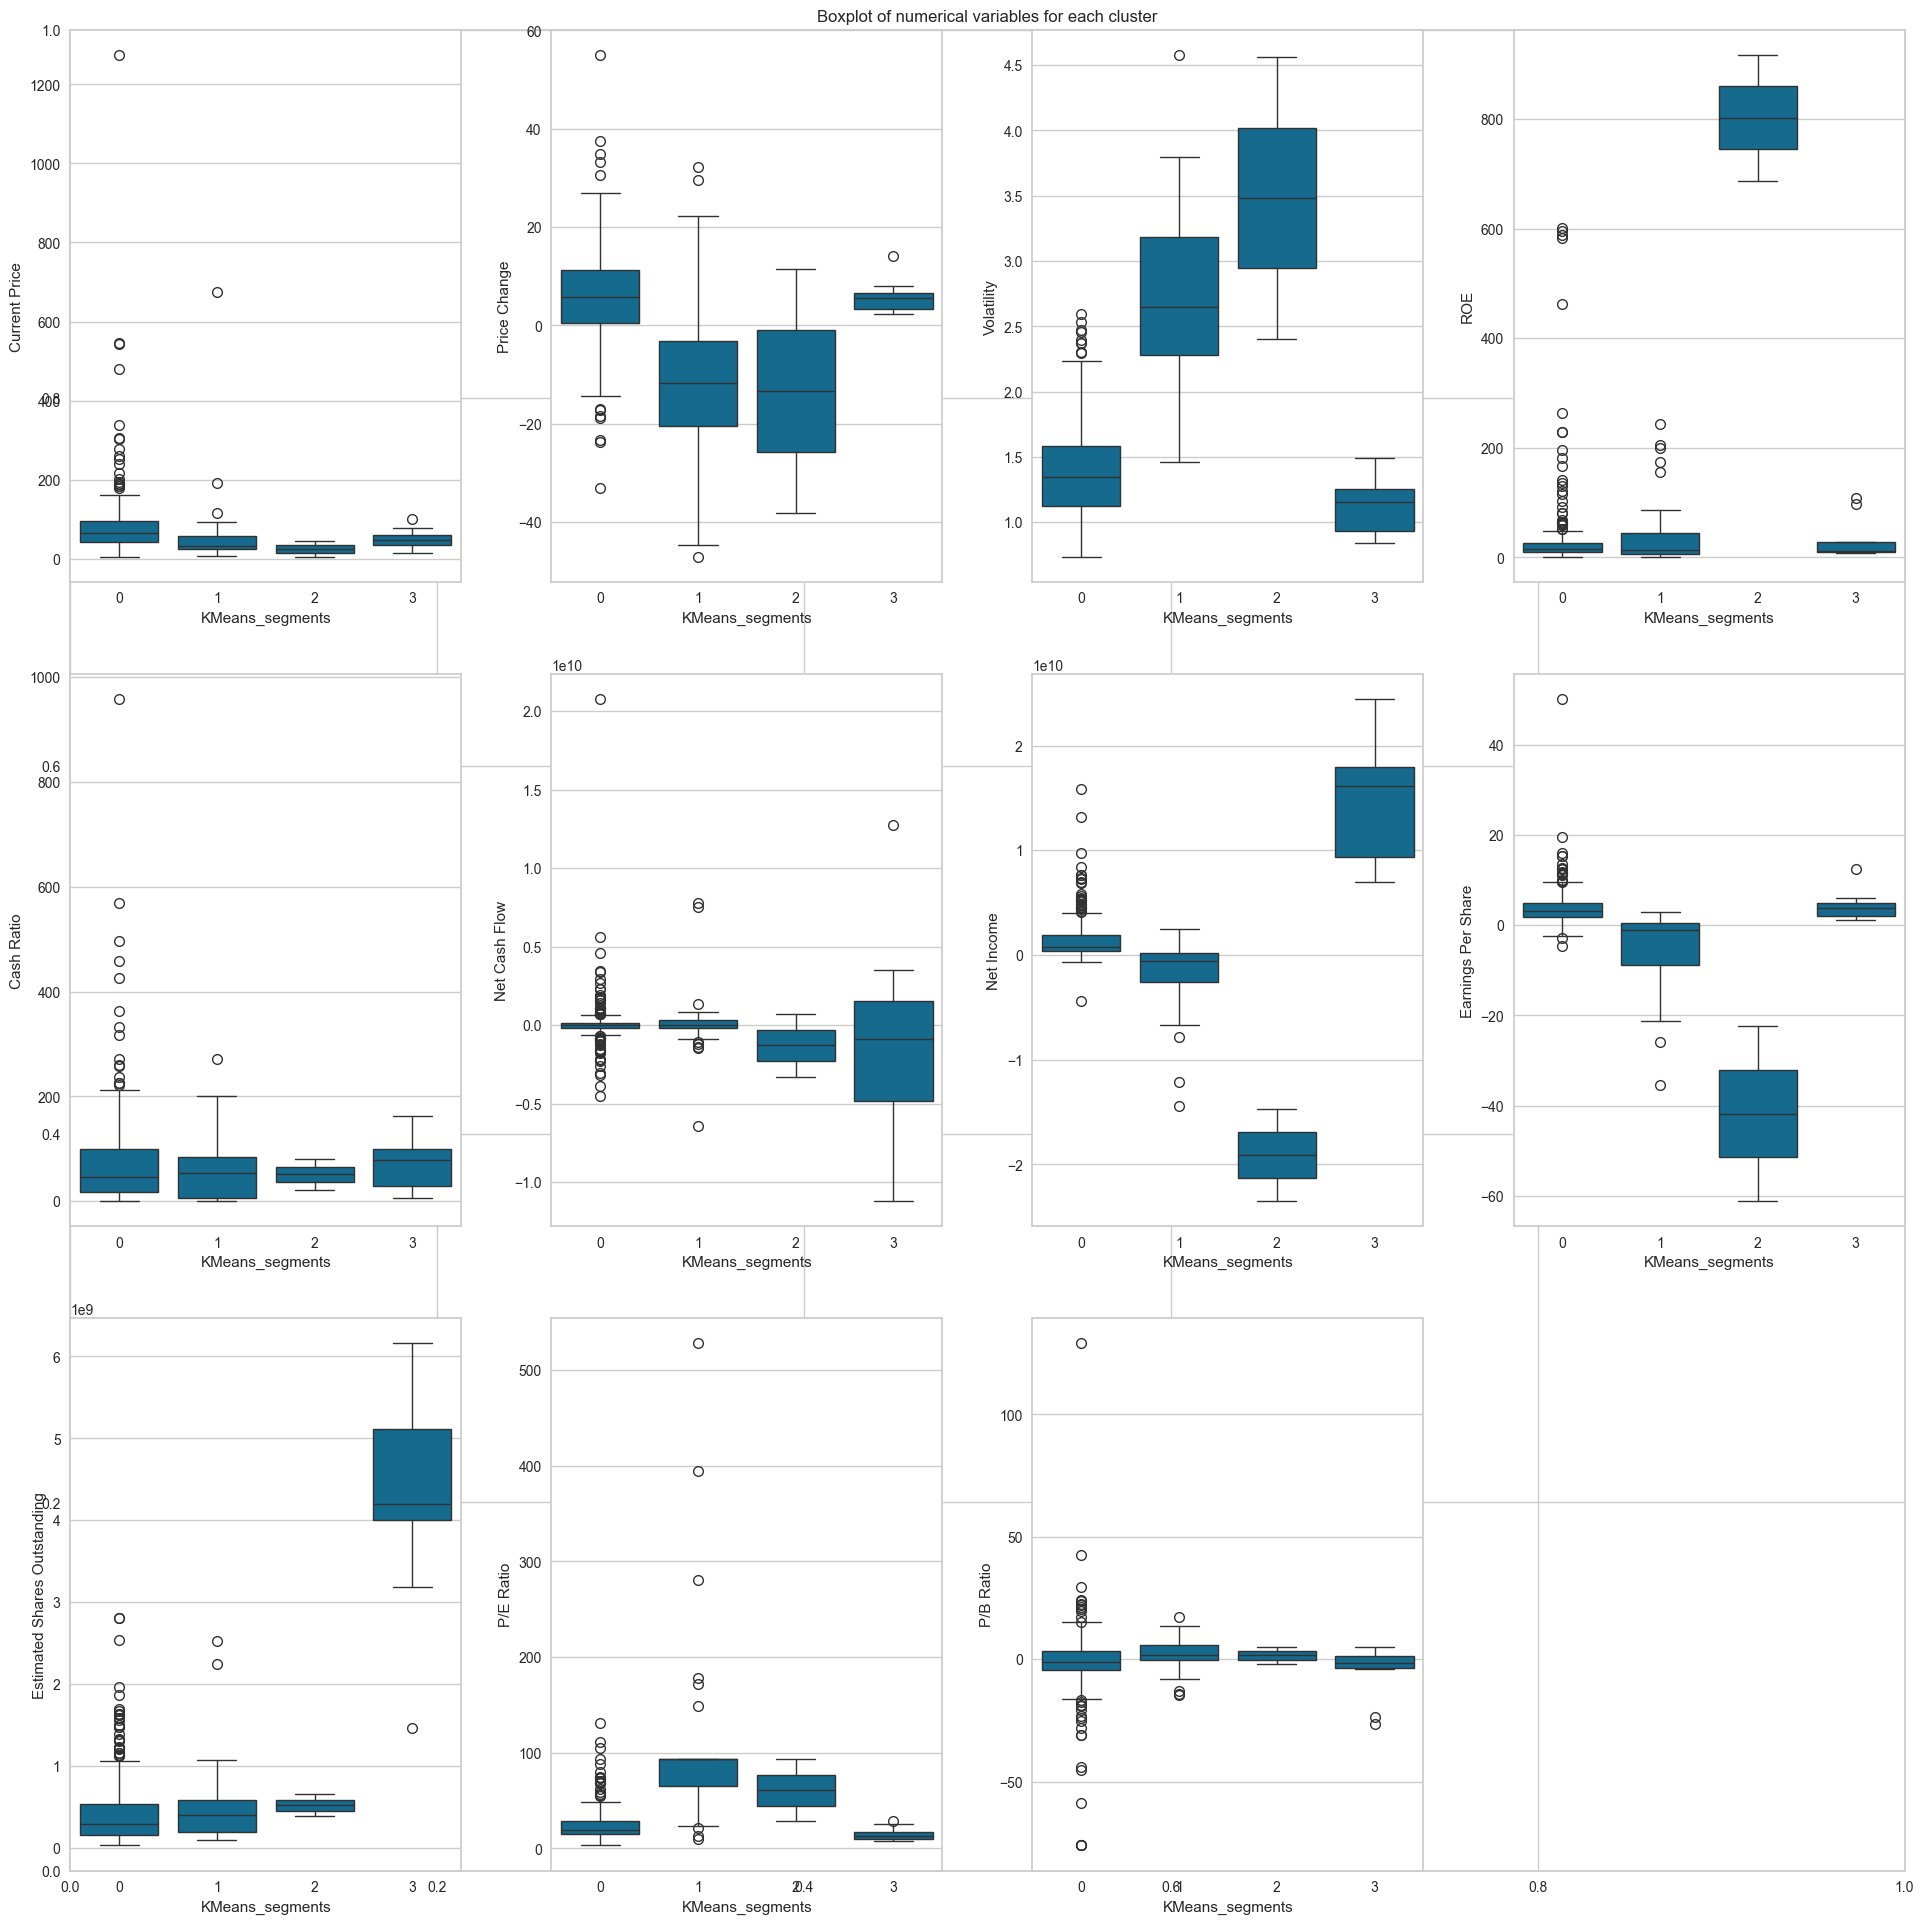

In [42]:
plt.figure(figsize=(20,20))
plt.title('Boxplot of numerical variables for each cluster')

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df1, x='KMeans_segments', y=variable)

plt.tight_layout(pad=2.0)

In [43]:
kmeans2 = KMeans(n_clusters=5, random_state=1)
kmeans2.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

In [44]:
df2 = df.copy()

k_means_df['KMeans_segments'] = kmeans2.labels_
df2['KMeans_segments'] = kmeans2.labels_

In [45]:
km_cluster_profile2 = df2.groupby('KMeans_segments').mean(numeric_only=True)

km_cluster_profile2['count_in_each_segment'] = df2.groupby('KMeans_segments')['Security'].count().values

km_cluster_profile2.style.highlight_max(color='yellow', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KMeans_segments,,,,,,,,,,,,
0,52.090769,6.760653,1.167206,27.384615,145.538462,735461538.461538,14055461538.461538,3.937692,3917917368.246154,19.672097,-3.471296,13
1,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,33.171250,-19.645940,3.190001,318.250000,49.000000,-1012310000.000000,-10230243500.000000,-24.605000,460260556.105000,76.219451,0.413931,8
4,80.476229,4.297183,1.499101,24.816720,67.758842,53759964.630225,1295540745.980707,3.471785,446065272.044469,28.441532,-1.421754,311


* Cluster 0 has a moderate Current Price and Net Cash Flow, with a higher Cash Ratio, indicating financially stable companies with solid liquidity.
* Cluster 1 shows a very high ROE and a significant negative Net Income, indicating potentially high-risk companies with volatile performance.
* Cluster 2 stands out with an extremely high Current Price and Price Change, alongside negative Net Income, possibly identifying outliers or companies with speculative valuation.
* Cluster 3 exhibits a negative Price Change, high Volatility, and very negative Net Income, suggesting financially distressed companies.
* Cluster 4 has balanced metrics with a strong P/E Ratio and a positive Net Income, representing stable, growth-oriented companies.

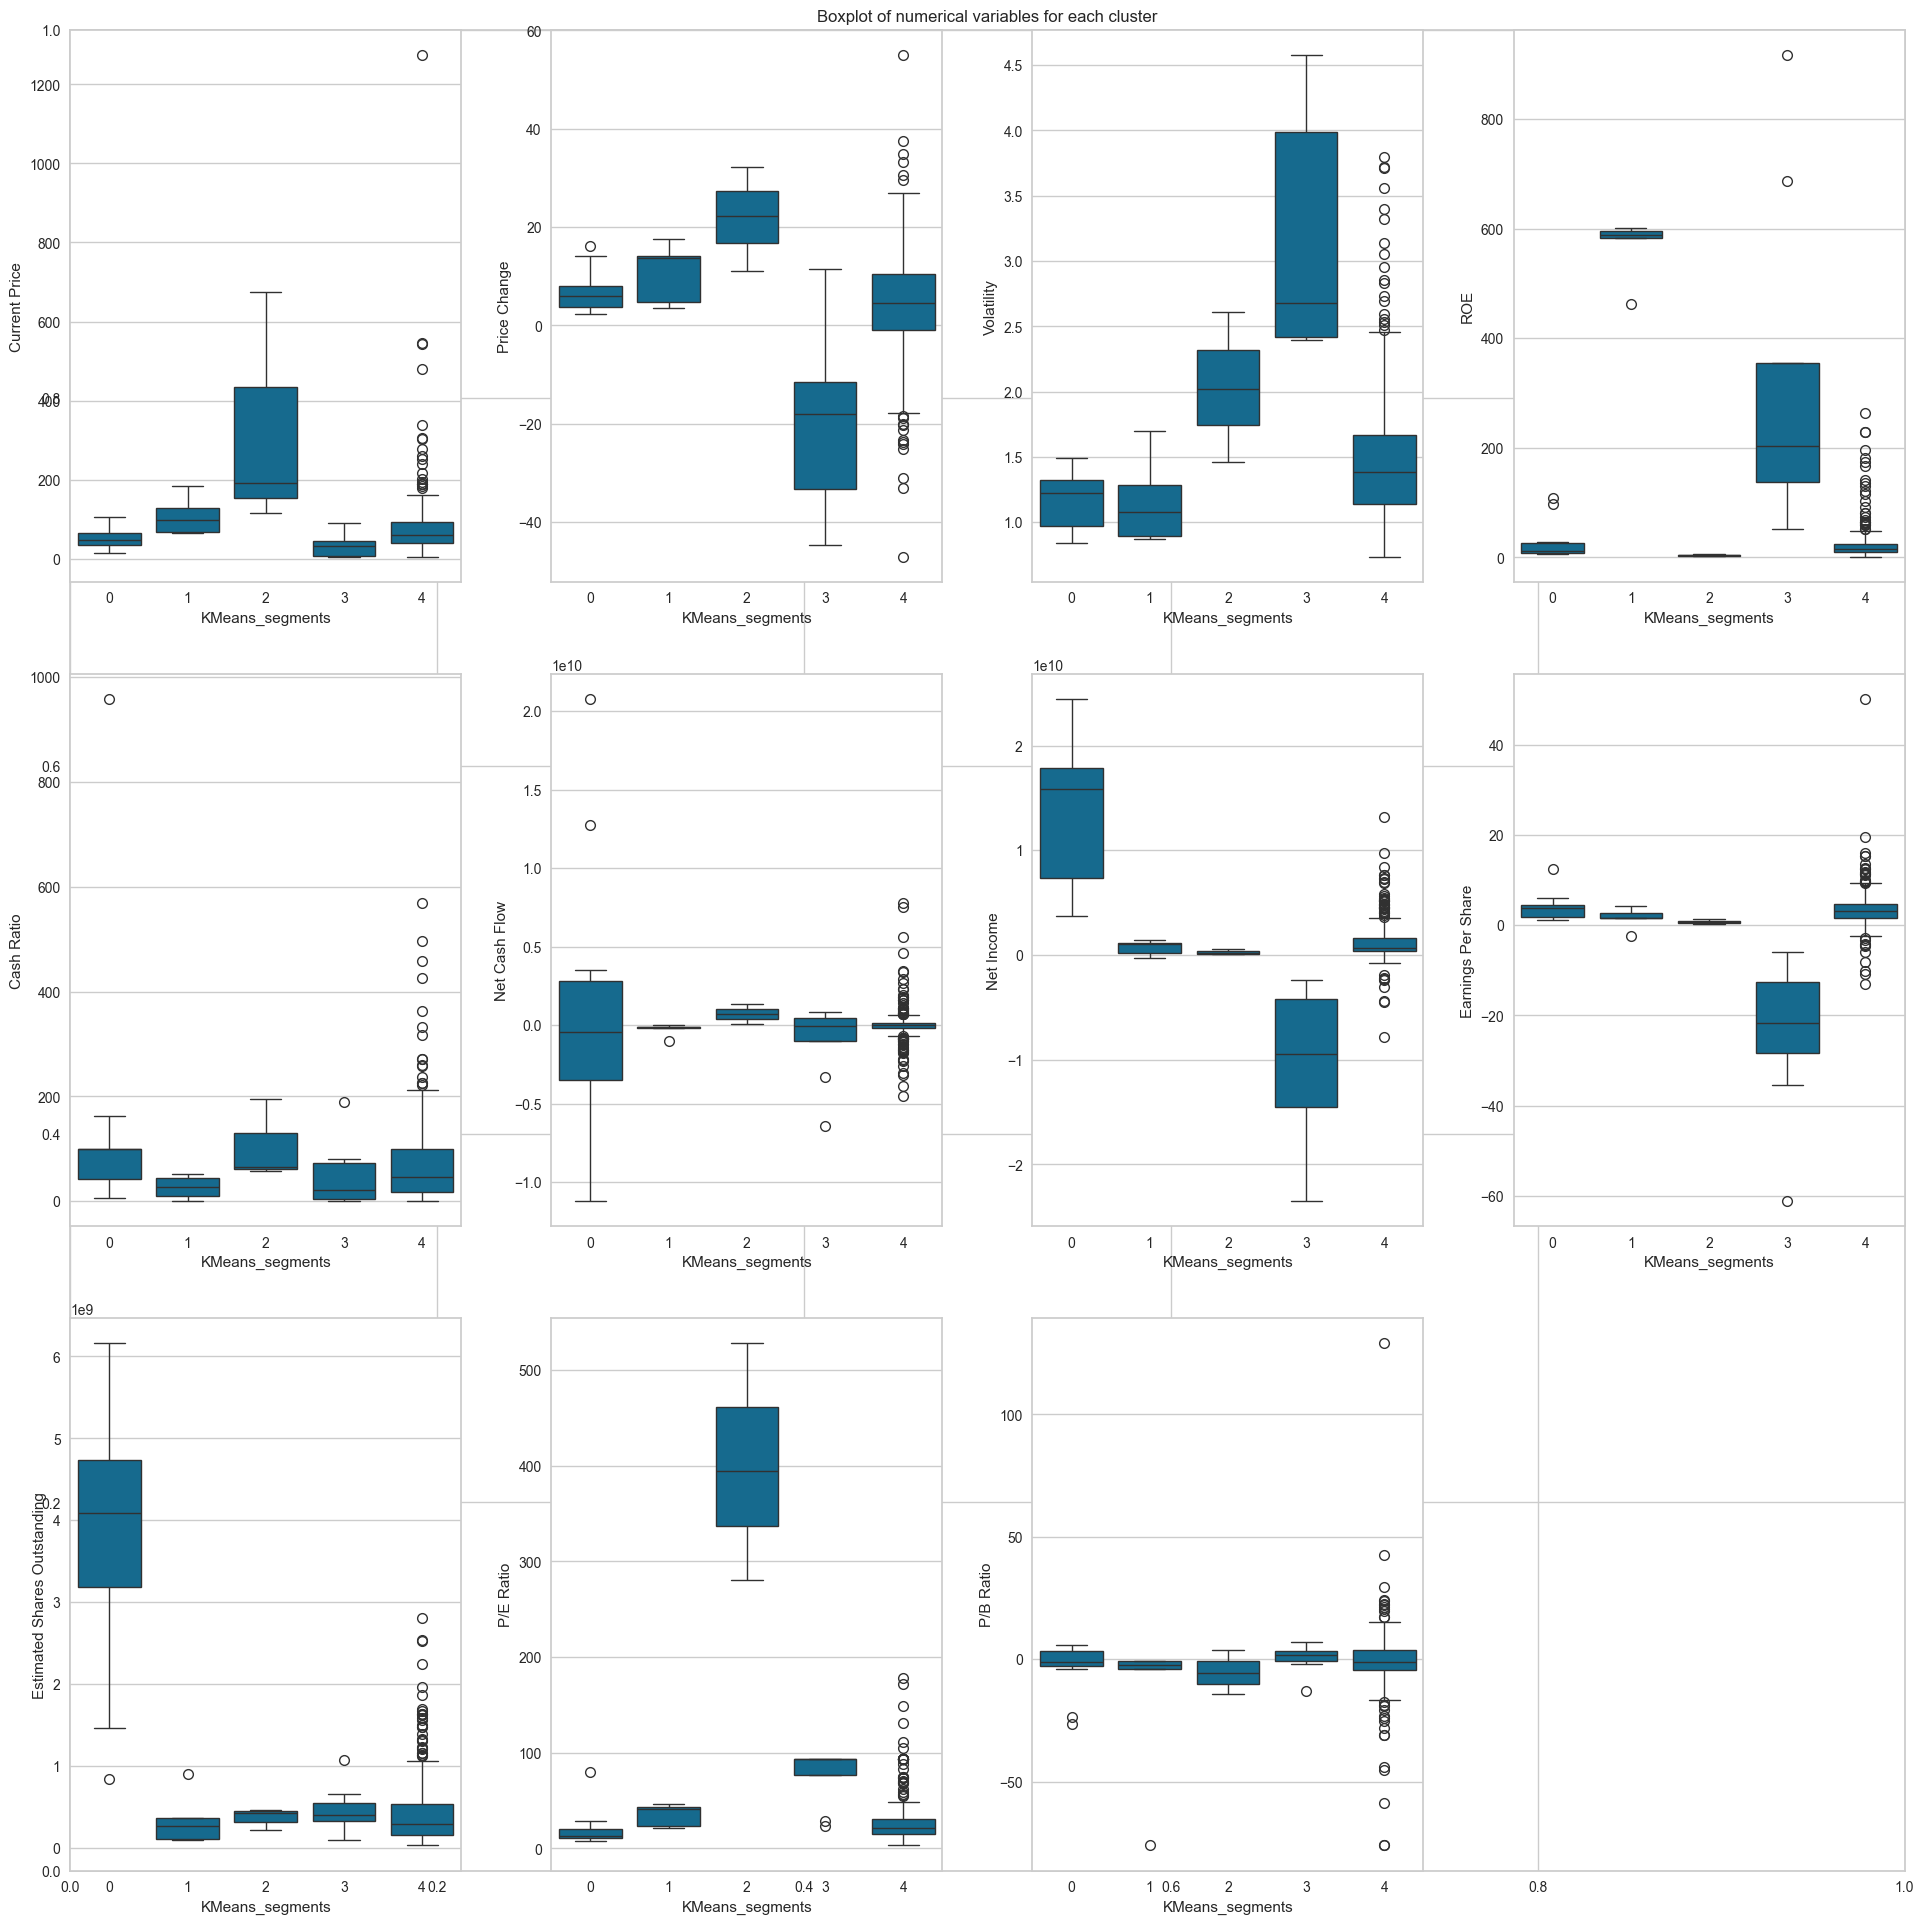

In [46]:
plt.figure(figsize=(20,20))
plt.title('Boxplot of numerical variables for each cluster')

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df2, x='KMeans_segments', y=variable)

plt.tight_layout(pad=2.0)

### Final thoughts

* The KMeans model with 4 clusters offers a clearer and more interpretable segmentation of companies, and provides a balance between capturing meaningful insights and maintaining simplicity.
* The KMeans model with 5 clusters introduces more complexity and nuance, which may be beneficial if deeper segmentation is required, but could complicate interpretation.

## Hierarchical Clustering

In [47]:
hc_df = subset_scaled_df.copy()

In [48]:
distance_metrics = ['euclidean', 'chebyshev', 'mahalanobis', 'cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']

high_cophenet_corr = 0
high_dm_lm = [0,0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            f'Cophenetic correlation for {dm.capitalize()} distance and {lm} linkage is {c}'
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736
Cophenetic correlation for M

In [49]:
print(
    f'Highest cophenetic correlation is {high_cophenet_corr}, which is obtained with {high_dm_lm[0].capitalize()} distance and {high_dm_lm[1]} linkage'
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage


In [50]:
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward', 'weighted']

high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print(f'Cophenetic correlation for {lm} linkage is {c}')
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = 'euclidean'
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922
Cophenetic correlation for complete linkage is 0.7873280186580672
Cophenetic correlation for average linkage is 0.9422540609560814
Cophenetic correlation for centroid linkage is 0.9314012446828154
Cophenetic correlation for ward linkage is 0.7101180299865353
Cophenetic correlation for weighted linkage is 0.8693784298129404


In [51]:
print(
    f'Highest cophenetic correlation is {high_cophenet_corr}, which is obtained with {high_dm_lm[1]} linkage'
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage


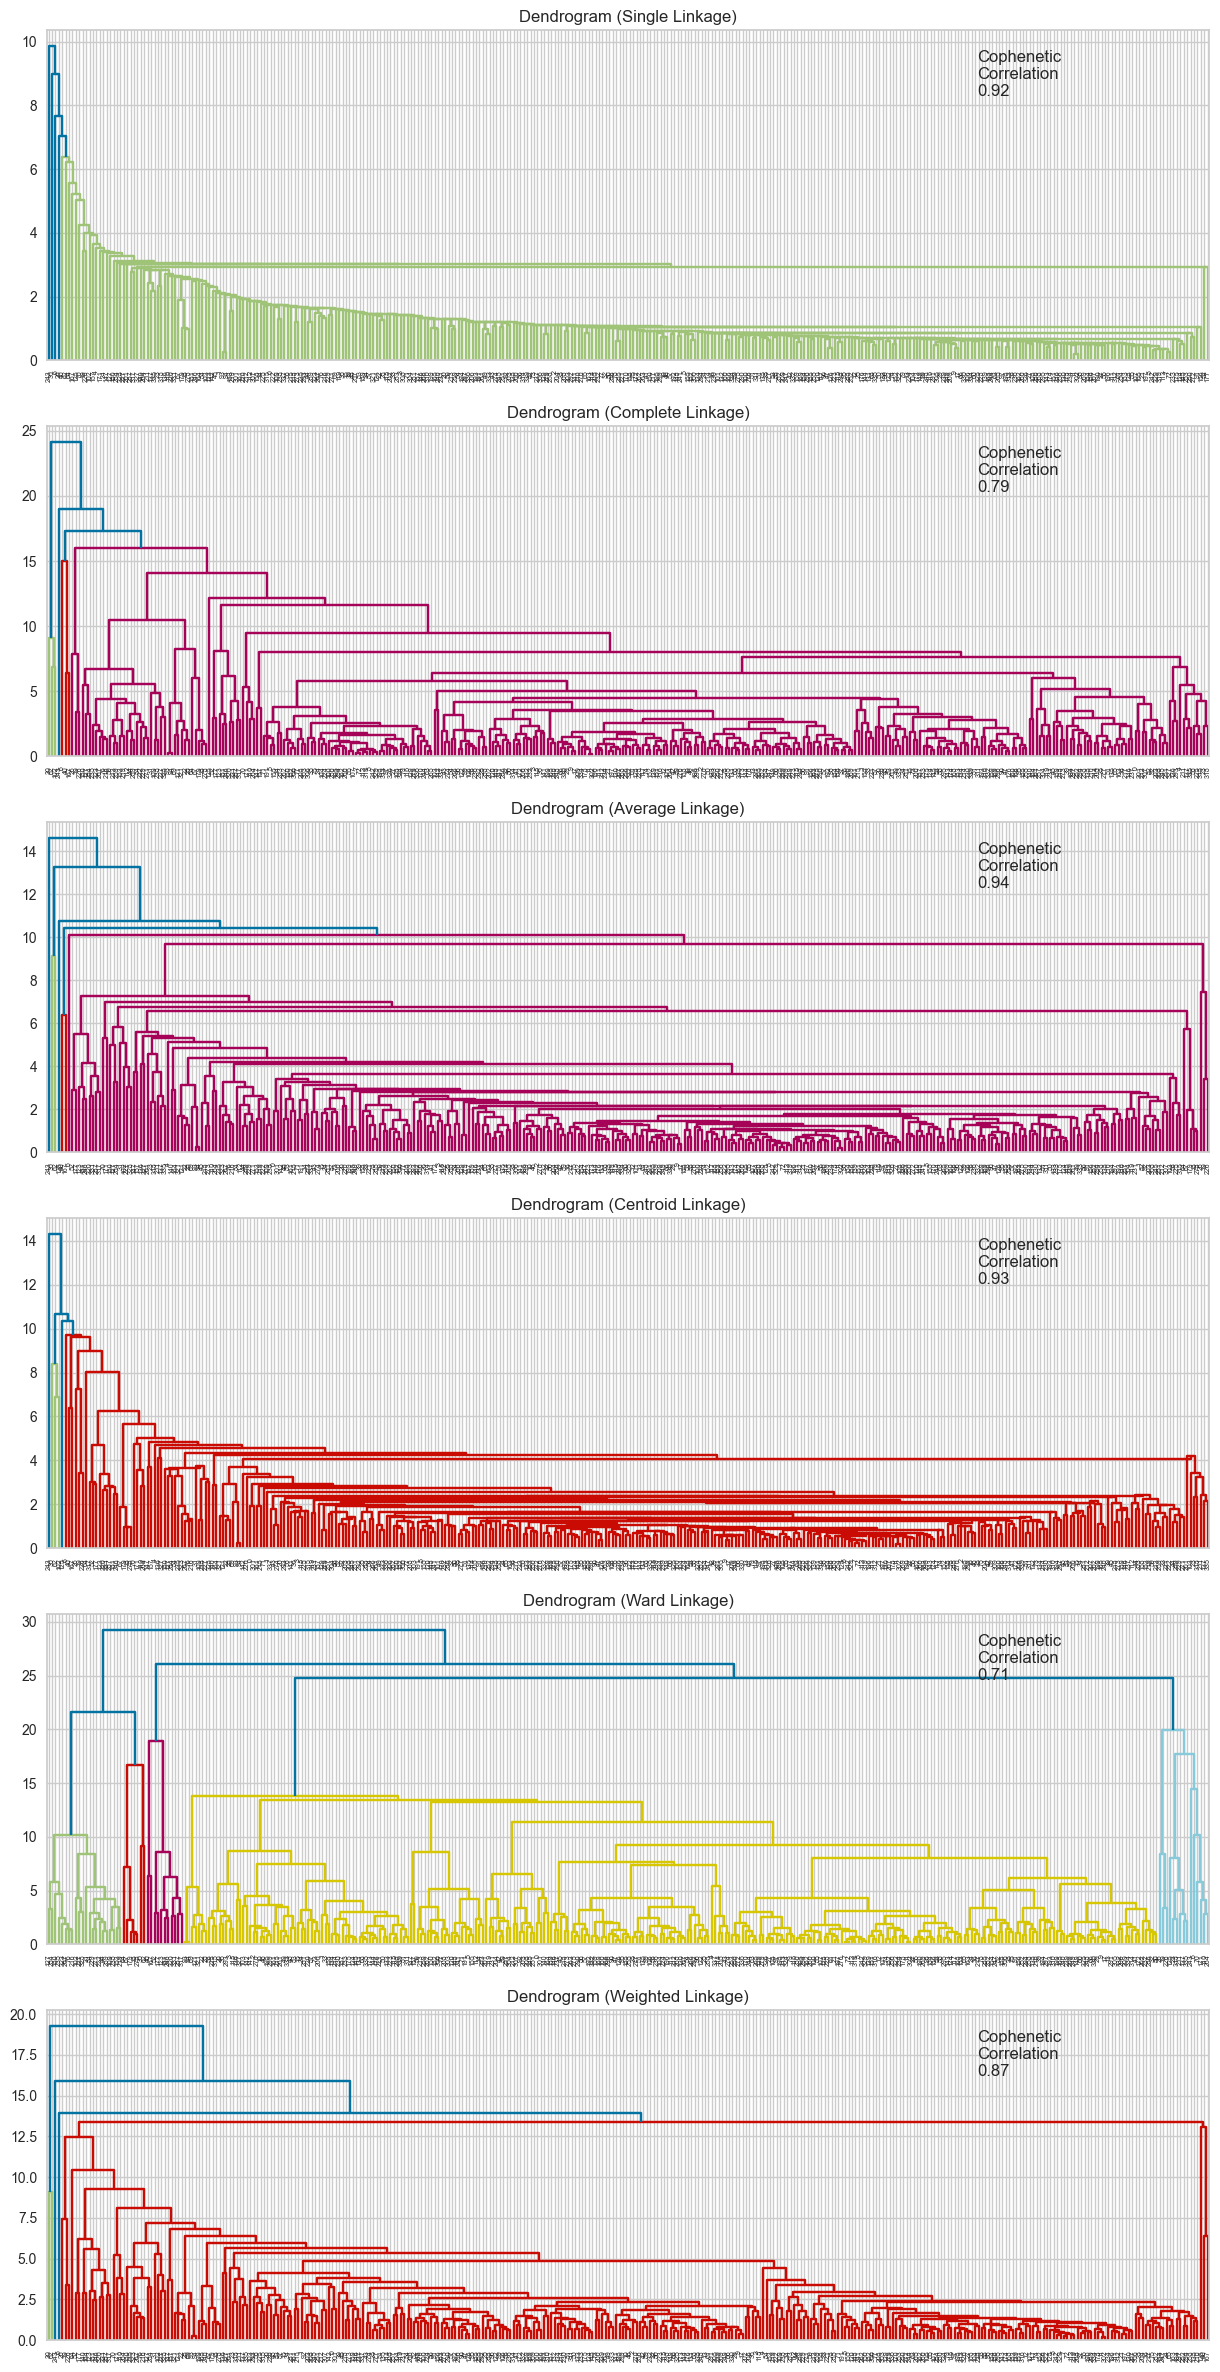

In [52]:
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward', 'weighted']

compare_cols = ['Linkage', 'Cophenetic Coefficient']

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f'Cophenetic\nCorrelation\n{coph_corr:0.2f}',
        (0.80, 0.80),
        xycoords='axes fraction'
    )

* Average linkage has the highest cophenetic correlation, but visually ward linkage appears to show better clustering.

### Creating model using sklearn

In [53]:
HCmodel1 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='average')
HCmodel1.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [54]:
df3 = df.copy()

In [55]:
hc_df['HC_segments'] = HCmodel1.labels_
df3['HC_segments'] = HCmodel1.labels_

### Cluster Profiling

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [57]:
hc_cluster_profile1 = df3.iloc[:,4:].groupby('HC_segments').mean()

In [58]:
hc_cluster_profile1['count_in_each_segment'] = (
    df3.groupby('HC_segments')['Security'].count().values
)

In [59]:
hc_cluster_profile1.style.highlight_max(color='yellow', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


* This clustering is not very good. There are 333 securities in 1 cluster and the rest have 1 or 2. Let's try a model using ward linkage.

In [60]:
HCmodel2 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
HCmodel2.fit(hc_df)

AgglomerativeClustering(n_clusters=6)

In [61]:
df4 = df.copy()

In [62]:
hc_df['HC_segments'] = HCmodel2.labels_
df4['HC_segments'] = HCmodel2.labels_

In [64]:
hc_cluster_profile2 = df4.iloc[:,4:].groupby('HC_segments').mean()

In [65]:
hc_cluster_profile2['count_in_each_segment'] = (
    df4.groupby('HC_segments')['Security'].count().values
)

In [66]:
hc_cluster_profile2.style.highlight_max(color='yellow', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,152.566666,14.908086,1.769506,24.434783,281.913043,1747221304.347826,1866621956.521739,3.802174,759756952.867391,38.674023,16.027369,23
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


* We are getting a better spread of securities with ward linkage.
* Cluster 4 stands out with an exceptionally high Current Price and ROE, suggesting it may capture outliers or very high-value companies.
* Cluster 3 has a moderate Current Price and ROE but a very high Volatility, indicating potentially risky investments.
* Cluster 5 has a significant P/E Ratio and P/B Ratio, which could indicate overvaluation.
* Clusters 1 and 2 display unique patterns with Price Change and Volatility, potentially identifying niche segments.

In [67]:
HCmodel3 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
HCmodel3.fit(hc_df)

AgglomerativeClustering(n_clusters=5)

In [68]:
df5 = df.copy()

In [69]:
hc_df['HC_segments'] = HCmodel3.labels_
df5['HC_segments'] = HCmodel3.labels_

In [70]:
hc_cluster_profile3 = df5.iloc[:,4:].groupby('HC_segments').mean()

In [72]:
hc_cluster_profile3['count_in_each_segment'] = (
    df5.groupby('HC_segments')['Security'].count().values
)

In [73]:
hc_cluster_profile3.style.highlight_max(color='yellow', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,72.432035,5.255290,1.426349,25.512195,60.881533,196157425.087108,1623022236.933798,3.652840,462816085.049861,24.645506,-2.618234,287
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


* Cluster 0 shows a high average Current Price and Cash Ratio, with a moderate Volatility. This cluster might represent stable companies.
* Cluster 1 captures the bulk of the data (287 segments) with more balanced metrics.
* Cluster 3 and 4 show very high and negative Net Cash Flow and Net Income, possibly indicating financially unstable companies.

### Final thoughts

* The model with 6 clusters has more refined and interpretable segments, and seems to capture more distinct patterns, which would lead to more detailed insights.
* The model with 5 clusters is more simplistic and captures broader categories, which may be easier to analyze, although may be too small to generalize from.

## K-means vs Hierarchical Clustering

We will be comparing the KMeans and Hierarchical Clustering models with 5 clusters.

**Which clustering technique took less time for execution?**

- Both clustering techniques executed extremely quickly, so there were no noticable differences here.

**Which clustering technique gave you more distinct clusters, or are they the same?**

- Both methods produced uneven cluster sizes, with a dominant cluster in each case. However, K-means clustering produced more detailed segmentation, particularly in terms of financial metrics like ROE and Net Income, where each cluster displayed unique characteristics.
- K-means clustering also provided a broader range of distinct financial profiles, especially with clusters showing extreme values like very high Price Change or very negative Net Cash Flow.
- Hierarchical clustering provided some distinct clusters, but the variations between clusters were less pronounced than in K-means.

**How many observations are there in the similar clusters of both algorithms?**

Hierarchical Clustering:
- Cluster 0: 15 observations
    - High "Current Price," moderate "Volatility," high "Cash Ratio."
- Cluster 1: 287 observations
    - Balanced metrics, the largest cluster.
- Cluster 2: 9 observations
    - Very negative "Net Cash Flow" and "Net Income."
- Cluster 3: 7 observations
    - Extremely high "ROE," negative "Net Cash Flow" and "Net Income."
- Cluster 4: 22 observations
    - Negative "Price Change," high "Volatility."
    
K-means Clustering:
- Cluster 0: 13 observations
    - Moderate "Current Price," high "Cash Ratio."
- Cluster 1: 5 observations
    - Extremely high "ROE," negative "Net Cash Flow" and "Net Income."
- Cluster 2: 3 observations
    - High "Current Price," very high "Volatility," negative "Net Income."
- Cluster 3: 8 observations
    - Very negative "Net Cash Flow" and "Net Income."
- Cluster 4: 311 observations
    - Balanced metrics, the largest cluster.
    
**How many clusters are obtained as the appropriate number of clusters from both algorithms?**

We concluded that for the Hierarchical Clustering models, the number of clusters recommended is 6 if the goal is to obtain more detailed insights and dstinct groups.

For the KMeans Clustering models, 5 clusters seems to be appropriate for a deeper analysis.

## Actionable Insights

**Stable Investments (K-means, k=5):**

- Stocks in Cluster 0 exhibit moderate prices, steady price changes, and lower volatility. These are likely to be blue-chip or well-established companies with stable performance. Consider these for long-term, low-risk portfolios.

**High-Risk, High-Reward Stocks (K-means, k=5):**

- Stocks in Cluster 3 display very high volatility and negative financial metrics, which makes them high-risk. However, they might present opportunities for short-term trading or speculative investments if there are signs of a potential turnaround.

**Overvalued Stocks (K-means, k=5):**

- Cluster 2 contains stocks with very high "Current Price" and "P/E Ratio," suggesting overvaluation. Monitor these closely for any signs of a price correction or bubble burst. These stocks might be suitable for short-term gains but carry significant risk if market sentiment shifts.

**Growth Opportunities (Hierarchical Clustering, k=5):**

- Stocks in Cluster 1 show a balance between growth and stability, making them ideal for investors looking for a moderate-risk portfolio with growth potential. These stocks could be in the growth phase and offer good returns over time.

## Recommendations

**Long-Term, Low-Risk Stocks:**

- Allocate a significant portion of your portfolio to Cluster 0 stocks from K-means clustering for steady returns with minimal risk. These are likely to be companies with strong fundamentals and consistent performance.

**High-Risk, High-Reward Stocks:**

- Consider Cluster 3 from K-means clustering for high-risk trades. These stocks might offer quick gains but require careful monitoring and risk management strategies.

**Possible Overpriced Stocks:**

- Be cautious with stocks in Cluster 2 from K-means clustering as they seem expensive compared to their earnings. These might be overvalued, so it's a good idea to keep an eye on them and consider selling if their prices start to drop.

**Growth Stocks:**

- Explore stocks in Cluster 1 from Hierarchical Clustering for their growth potential as they are growing steadily. These are good for people looking for moderate-risk investments with the potential for good returns over time.